# Hillslope Mesh

In [1]:
import tinerator as tin
import numpy as np
from matplotlib import pyplot as plt

[16:48:30] Hillslope and quad meshes are an experimental feature.              ]8;id=1629931710.937715-703390;file:///Users/livingston/dev/lanl/tinerator/tinerator/logging.py\logging.py]8;;\:126

           Expect things to break.                                             ]8;id=1629931710.940673-967351;file:///Users/livingston/dev/lanl/tinerator/tinerator/logging.py\logging.py]8;;\:126

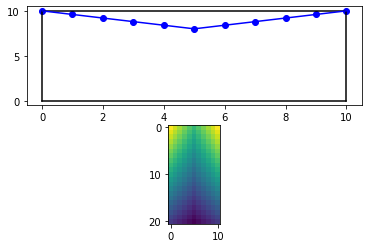

In [7]:
def make_mesh(
    slope = 0.5,
    x_range = [0.0, 10.0],
    y_range = [0.0, 20.0],
    z_range = [0.0, 10.0],
    v_x = None,
    v_z = None
):
    x_min, x_max = x_range
    y_min, y_max = y_range
    z_min, z_max = z_range
    
    if v_x is None:
        v_x = x_min + (x_max - x_min) / 2.
    
    v_y = y_min + (y_max - y_min) / 2.
    
    if v_z is None:
        v_z = 0.8 * z_max
    
    n_x = 11
    n_y = 21
    n_z = 11
    
    x = np.linspace(x_min, x_max, n_x)
    y = np.linspace(y_min, y_max, n_y)
    z = np.abs((v_z - z_max) / (v_x - x_min) * (x - v_x)) + v_z
    
    """
    x-x-x
    x-x-x = z_data
    x-x-x
    
    
    1    x-x-x
  .75  * x-x-x -> 
   .5    x-x-x
    """
    
    scaling = np.linspace(1, 1 - slope, n_y)[:,None]
    z_data = scaling * np.tile(z, (len(y), 1))
    
    f, ax = plt.subplots(nrows=2, ncols=1)#, sharex=True)
    
    ax[0].plot([x_min, x_max], [z_min, z_min], c='black')
    ax[0].plot([x_min, x_max], [z_max, z_max], c='black')
    ax[0].plot([x_min, x_min], [z_min, z_max], c='black')
    ax[0].plot([x_max, x_max], [z_min, z_max], c='black')
    
    ax[0].plot(x, z, c='blue')
    ax[0].scatter(x, z, c='blue')
    
    ax[1].imshow(z_data)
    
    quad_mesh = tin.meshing.create_hillslope_mesh(
        z_data, x_coords=x, y_coords=y
    )
    quad_mesh.view()
    
    layers = [("snapped", z_min, n_z, 1),]
    hex_mesh = tin.meshing.extrude_mesh(quad_mesh, layers)
    
    surface_mesh = hex_mesh.surface_mesh()
    top_faces = surface_mesh.top_faces
    bottom_faces = surface_mesh.bottom_faces
    side_faces = surface_mesh.side_faces
    
    normals = surface_mesh.from_cell_normals()
    
    sets = normals + [top_faces]
    
    #hex_mesh.view(sets=sets)
    #hex_mesh.save("open-book-3D.exo", sets=sets)
    
    #surface_mesh.save("open-book.vtk")
    
    #for (i,s) in enumerate(sets):
    #    s.save(f"open-book-{s.name}.vtk")
    
    

make_mesh()

In [ ]:
z = np.array([[3,2,3], [3,2,3], [3,2,3], [3,2,3], [3,2,3]])

scale = np.array([0.5, 0.5, 0.5, 0.5, 0.5])[:,None]
print(z)
print(z * scale)

In [ ]:
"""
- slope is applied across z

- 10 meters wide
- 2 m deep, 10 m wide
- dy: 10-20 m

- fix port in Dockerfile (8899)
- push plotly stuff

- vtk subplots
"""

def make_mesh(x_range = [0.0, 10.0], y_range = [None, None], z_range = [0.0, 2.0], v_z = None):
    x_min, x_max = x_range
    z_min, z_max = z_range
    
    v_x = x_min + (x_max - x_min) / 2.
    
    if v_z is None:
        v_z = 0.75 * z_max
    
    plt.plot([x_min, x_max], [z_min, z_min], c='black')
    plt.plot([x_min, x_max], [z_max, z_max], c='black')
    plt.plot([x_min, x_min], [z_min, z_max], c='black')
    plt.plot([x_max, x_max], [z_min, z_max], c='black')
    


def make_mesh(
        dx = 1,
        dy = 1,
        dz = 1,
        z_slope = 0.5,
        v_depth = 2,
        x_min = 0.0,
        x_max = 10.0,
        y_min = 0.0,
        y_max = 5.0,
        z_min = 0.0,
        z_max = 5.0
    ):
    
    z = np.abs(x - v_x) + v_z
    
    x_c = x_min + (x_max - x_min) / 2.
    y_c = y_min + (y_max - y_min) / 2.
    z_c = z_min + (z_max - z_min) / 2.
    
    n_x = int(np.round((x_max - x_min) / dx))
    n_y = int(np.round((y_max - y_min) / dy))
    n_z = int(np.round((z_max - z_min) / dz))
    
    x = np.linspace(x_min, x_max, n_x + 1)
    y = np.linspace(y_min, y_max, n_y + 1)
    
    z = np.empty_like(x)
    
    z0 = z_max - v_depth
    
#    for i in range(len(x)):        
#        z[i] = (z_max - v_depth) / (x_c)
    
    z_data = np.tile(z, (len(y),1))
    
    f, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
    
    ax[0].plot(x, z)
    ax[0].scatter(x, z)
    ax[1].imshow(z_data)
    plt.show()
    
    quad_mesh = tin.meshing.create_hillslope_mesh(
        z_data, x_coords=x, y_coords=y
    )
    quad_mesh.view()
    
    layers = [("snapped", z_min, n_z, 1),]
    hex_mesh = tin.meshing.extrude_mesh(quad_mesh, layers)
    hex_mesh.view()
    

#make_mesh(1., 1., 0.5, depth = 2, x_max = 5.0)

make_mesh(
    dx = 1.,
    dy = 1.,
    dz = 1.,
)

#make_mesh(80.0, 0.2, 0.0005)
#make_mesh([0, 10], [5, 2.5], 1)
    

_ = """
import tinerator as tin

CELLS_LENGTH = 100
CELLS_DEPTH = 20

z_data = [1.0 + 3.0 * i / CELLS_LENGTH for i in range(CELLS_LENGTH)]
x_coords = list(range(len(z_data)))
y_coords = [0.0, 1.0]

quad_mesh = tin.meshing.create_hillslope_mesh(
    z_data, x_coords=x_coords, y_coords=y_coords
)
print(quad_mesh)
quad_mesh.view()

layers = [
    ("constant", 2, 10, 1),
    ("constant", 20, 100, 2),
]

hex_mesh = tin.meshing.extrude_mesh(quad_mesh, layers)
print(hex_mesh)

surf_mesh = hex_mesh.surface_mesh()

sets = [
    surf_mesh.top_faces,
    surf_mesh.bottom_faces,
]

sets += [
    x
    for x in surf_mesh.from_cell_normals()
    if x.name in ["north", "south", "east", "west"]
]

fractures = [
    [[10, 0.5, -12.0], [20, 0.5, -3]],
    [[60, 0.5, 2.0], [80, 0.5, -10]],
    [[30, 0.5, 1], [40, 0.5, -1]],
]

for (i, fracture) in enumerate(fractures):
    cell_ids = hex_mesh.get_cells_along_line(fracture[0], fracture[1])
    hex_mesh.set_cell_materials(cell_ids, 5 + i)

hex_mesh.view(active_scalar="material_id", sets=sets)

# Temp - until MSTK is fixed
for s in sets:
    s.name = None

hex_mesh.save("hex_out.exo", sets=sets)
"""

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

dx = 80.0
dz = 0.2
slope = 0.0005

x_max = 400.0
n_x = int(np.round(x_max / dx))

x = np.linspace(0.0, x_max, n_x + 1)
z = -slope * x

plt.plot(x, z)
plt.scatter(x, z)
plt.show()

quad_mesh = tin.meshing.create_hillslope_mesh(
    z, x_coords=x, y_coords=[0.0, 1.0]
)

quad_mesh.view()